In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 865.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [2]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the YOLOv8 model

In [4]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


## Read and display the input image

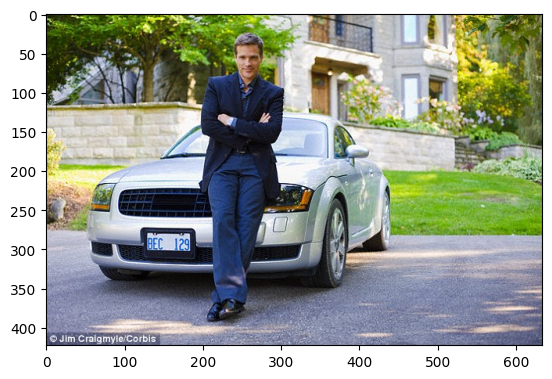

In [8]:
image = cv2.imread('/car_person.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

# Apply YOLO model and print the results

In [9]:
results = model(image)
results[0].boxes


0: 448x640 1 person, 1 car, 42.1ms
Speed: 4.8ms preprocess, 42.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 2.], device='cuda:0')
conf: tensor([0.9273, 0.8787], device='cuda:0')
data: tensor([[196.9826,  26.6279, 304.5623, 396.1759,   0.9273,   0.0000],
        [ 53.6258, 125.4249, 442.6378, 351.7579,   0.8787,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (423, 634)
shape: torch.Size([2, 6])
xywh: tensor([[250.7725, 211.4019, 107.5798, 369.5480],
        [248.1318, 238.5914, 389.0120, 226.3330]], device='cuda:0')
xywhn: tensor([[0.3955, 0.4998, 0.1697, 0.8736],
        [0.3914, 0.5640, 0.6136, 0.5351]], device='cuda:0')
xyxy: tensor([[196.9826,  26.6279, 304.5623, 396.1759],
        [ 53.6258, 125.4249, 442.6378, 351.7579]], device='cuda:0')
xyxyn: tensor([[0.3107, 0.0630, 0.4804, 0.9366],
        [0.0846, 0.2965, 0.6982, 0.8316]], device='cuda:0')

## Draw bounding box around objects and display class label over them

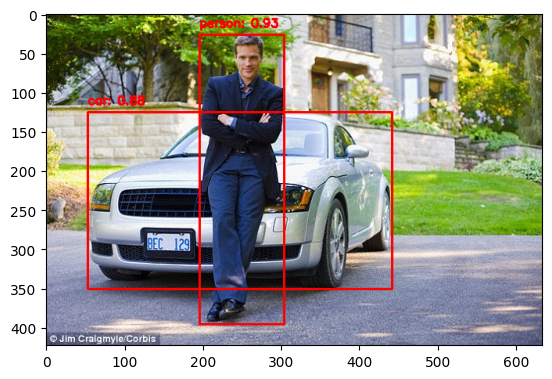

In [10]:
rgb_copy = rgb_image.copy()
for i, box in enumerate(results[0].boxes.xyxy): # Get bounding boxes
        x1, y1, x2, y2 = map(int, box)  # Convert to integer coordinates
        confidence = results[0].boxes.conf[i].item()  # Confidence score
        class_id = int(results[0].boxes.cls[i].item())  # Class index
        label = f"{results[0].names[class_id]}: {confidence:.2f}"  # Label text
        # Draw bounding box
        cv2.rectangle(rgb_copy, (x1, y1), (x2, y2), (255,0,0), 2)

        # Put label text
        cv2.putText(rgb_copy, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0, 0), 2)
plt.imshow(rgb_copy)